NAMA  : Rizqi Abdillah
NIM   : 202231508
UTS   : Pembelajaran Mesin

REGRESI

1. Upload Terlebih Dahulu Dataset R01_students_performance


2. Import Library

In [32]:
import pandas as pd                 # Import pustaka pandas untuk manipulasi data
import numpy as np                  # Import pustaka numpy untuk operasi numerik
from matplotlib import pyplot as plt # Import pyplot dari matplotlib untuk visualisasi

from sklearn.model_selection import train_test_split  # Import fungsi untuk membagi data latih dan uji
from sklearn.neighbors import KNeighborsRegressor     # Import algoritma KNN Regressor
from sklearn.metrics import r2_score                  # Import metrik R-squared untuk evaluasi model

3. Baca Dataset

In [33]:
dataset = pd.read_csv('R01_students_performance.csv', delimiter=",")  # Pastikan delimiter sesuai dengan file CSV
data = pd.DataFrame(dataset)   # Mengonversi dataset ke dalam format DataFrame pandas

4. Menampilkan kolom

In [34]:
print(data.columns)  # Menampilkan kolom untuk memeriksa apakah sudah benar

Index(['Study Hours (X)', 'Exam Scores (Y)'], dtype='object')


5. Memisahkan kolom 'Study Hours (X)' sebagai fitur (X) dan 'Exam Scores (Y)' sebagai target (Y)

In [35]:
x = data[['Study Hours (X)']].values  # Fitur yang akan digunakan (Study Hours)
y = data['Exam Scores (Y)'].values    # Target yang ingin diprediksi (Exam Scores)

6. Membagi data menjadi data latih dan data uji dengan perbandingan 80:20

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

7. Mendefinisikan model KNN dengan jumlah tetangga k=3

In [37]:
k = 3  # Nilai k (jumlah tetangga) ditetapkan ke 3
knn_model = KNeighborsRegressor(n_neighbors=k)  # Membuat model KNN Regressor

8.  Melatih model dengan data latih (fit model)

In [38]:
knn_model.fit(x_train, y_train)  # Melakukan training model KNN menggunakan data latih

KNeighborsRegressor(n_neighbors=3)

9. Melakukan prediksi pada data uji

In [39]:
prediksi_scores_knn = knn_model.predict(x_test)  # Prediksi nilai Exam Scores untuk data uji

10. Visualisasi hasil prediksi KNN dibandingkan dengan data asli

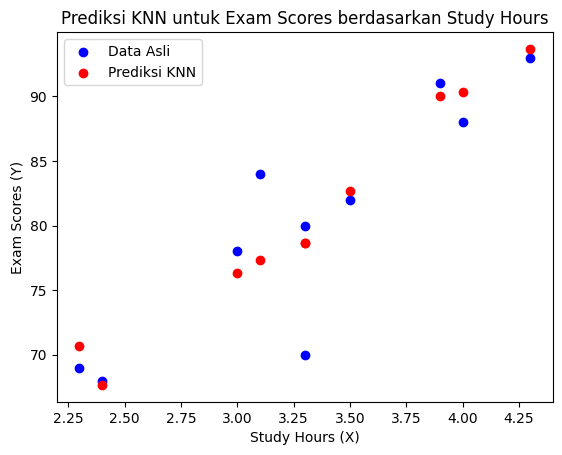

In [42]:
plt.scatter(x_test, y_test, color='blue', label='Data Asli')        # Plot data asli dalam warna biru
plt.scatter(x_test, prediksi_scores_knn, color='red', label='Prediksi KNN')  # Plot prediksi dalam warna merah
plt.xlabel('Study Hours (X)')    # Menambahkan label X untuk grafik
plt.ylabel('Exam Scores (Y)')    # Menambahkan label Y untuk grafik
plt.title('Prediksi KNN untuk Exam Scores berdasarkan Study Hours')  # Judul grafik
plt.legend()                     # Menampilkan legenda
plt.show()                       # Menampilkan grafik

11. Menghitung nilai R-squared untuk mengevaluasi akurasi model

In [31]:
r2_knn = r2_score(y_test, prediksi_scores_knn)  # Menghitung skor R-squared untuk model
print(f'R-squared (KNN): {r2_knn}')             # Menampilkan nilai R-squared

R-squared (KNN): 0.8189821677222295


Dataset **Klasifikasi**

1. Upload Dataset dan Impor library yang belum terpenuhi dan dibutuhkan untuk dataset ini

In [95]:
# Mengimpor LabelEncoder dari sklearn untuk encoding kolom kategori
from sklearn.preprocessing import LabelEncoder
# Mengimpor StandardScaler untuk menstandarkan fitur-fitur numerik
from sklearn.preprocessing import StandardScaler
# Mengimpor KNeighborsClassifier untuk klasifikasi menggunakan K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Mengimpor accuracy_score untuk mengukur akurasi model klasifikasi
from sklearn.metrics import accuracy_score
# Mengimpor confusion_matrix untuk menghitung matriks kebingungan model
from sklearn.metrics import confusion_matrix
# Mengimpor seaborn untuk membuat visualisasi heatmap
import seaborn as sns

2. Baca Dataset

In [96]:
diabetes_df = pd.read_csv('K02_diabetes.csv', delimiter= ",")  # Mengimpor data dari file CSV
diabetes_df  # Menampilkan DataFrame yang telah dibaca

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


3. Mengonversi kolom kategori menjadi angka (encoding)

In [97]:
diabetes_df['gender'] = LabelEncoder().fit_transform(diabetes_df['gender'])  # Mengubah kolom 'gender' menjadi numerik (0 untuk Laki-laki, 1 untuk Perempuan)
diabetes_df['smoking_history'] = LabelEncoder().fit_transform(diabetes_df['smoking_history'])  # Mengubah kolom 'smoking_history' menjadi numerik

4. Menentukan fitur (X) dan target (y)

In [98]:
X_diabetes = diabetes_df.drop(columns='diabetes')  # Menyimpan semua kolom kecuali 'diabetes' sebagai fitur
y_diabetes = diabetes_df['diabetes']  # Menyimpan kolom 'diabetes' sebagai target (label)

5. Membagi dataset menjadi data pelatihan dan data pengujian (70% untuk pelatihan, 30% untuk pengujian)

In [99]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)

6. Menstandarkan fitur (scaling)

In [100]:
scaler_diabetes = StandardScaler()  # Membuat objek untuk penskalaan fitur
X_train_diabetes = scaler_diabetes.fit_transform(X_train_diabetes)  # Melakukan penskalaan pada data pelatihan
X_test_diabetes = scaler_diabetes.transform(X_test_diabetes)  # Melakukan penskalaan pada data pengujian (menggunakan parameter yang telah dipelajari dari data pelatihan)

7. Membuat dan melatih model K-Nearest Neighbors (KNN) untuk klasifikasi

In [101]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Membuat objek KNN dengan jumlah tetangga 5
knn_classifier.fit(X_train_diabetes, y_train_diabetes)  # Melatih model KNN dengan data pelatihan

KNeighborsClassifier()

8. Melakukan prediksi pada data pengujian

In [102]:
y_pred_diabetes = knn_classifier.predict(X_test_diabetes)  # Melakukan prediksi menggunakan model yang telah dilatih

9. Menghitung akurasi klasifikasi

In [103]:
classification_accuracy = accuracy_score(y_test_diabetes, y_pred_diabetes)  # Menghitung akurasi antara nilai prediksi dan nilai aktual
print("Akurasi Klasifikasi KNN (Diabetes):", classification_accuracy)  # Menampilkan akurasi model

Akurasi Klasifikasi KNN (Diabetes): 0.9609666666666666


10. Membuat visualisasi matriks kebingungannya

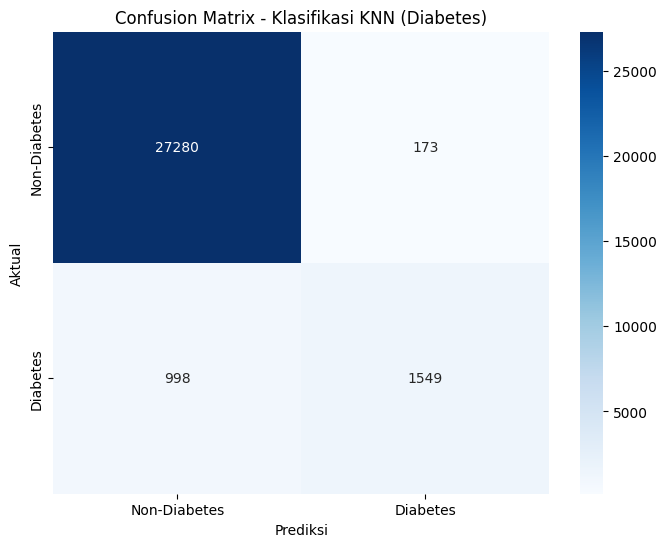

In [104]:
plt.figure(figsize=(8, 6))  # Menentukan ukuran gambar
cm = confusion_matrix(y_test_diabetes, y_pred_diabetes)  # Menghitung matriks kebingungannya
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])  # Menggunakan seaborn untuk visualisasi heatmap
plt.title('Confusion Matrix - Klasifikasi KNN (Diabetes)')  # Menambahkan judul ke grafik
plt.xlabel('Prediksi')  # Menambahkan label sumbu X
plt.ylabel('Aktual')  # Menambahkan label sumbu Y
plt.show()  # Menampilkan grafik